**Biudling a character-level RNN from scrath to classify names is a classification task**

# The goal of this task is to input a name and based on its spelling, classify it using a RNN to determine which language it belongs to

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
!unzip /content/gdrive/MyDrive/Dataset/RNN_Dataset.zip

Archive:  /content/gdrive/MyDrive/Dataset/RNN_Dataset.zip
   creating: data/
  inflating: data/eng-fra.txt        
   creating: data/names/
  inflating: data/names/Arabic.txt   
  inflating: data/names/Chinese.txt  
  inflating: data/names/Czech.txt    
  inflating: data/names/Dutch.txt    
  inflating: data/names/English.txt  
  inflating: data/names/French.txt   
  inflating: data/names/German.txt   
  inflating: data/names/Greek.txt    
  inflating: data/names/Irish.txt    
  inflating: data/names/Italian.txt  
  inflating: data/names/Japanese.txt  
  inflating: data/names/Korean.txt   
  inflating: data/names/Polish.txt   
  inflating: data/names/Portuguese.txt  
  inflating: data/names/Russian.txt  
  inflating: data/names/Scottish.txt  
  inflating: data/names/Spanish.txt  
  inflating: data/names/Vietnamese.txt  


This step filters non-disjunct symbols(characters of the Mn category), which are usually modifiers(for example, heavy notes)

In [ ]:
import glob
import os
import unicodedata
import string

In [ ]:
def findFiles(path):
  return glob.glob(path)

print(findFiles("/content/data/names/*.txt"))

['/content/data/names/Arabic.txt', '/content/data/names/Scottish.txt', '/content/data/names/German.txt', '/content/data/names/French.txt', '/content/data/names/Polish.txt', '/content/data/names/Irish.txt', '/content/data/names/Greek.txt', '/content/data/names/Russian.txt', '/content/data/names/Portuguese.txt', '/content/data/names/English.txt', '/content/data/names/Czech.txt', '/content/data/names/Japanese.txt', '/content/data/names/Italian.txt', '/content/data/names/Korean.txt', '/content/data/names/Vietnamese.txt', '/content/data/names/Chinese.txt', '/content/data/names/Dutch.txt', '/content/data/names/Spanish.txt']


In [ ]:
all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)
n_letters

57

In [ ]:
all_letters

"abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ .,;'"

In [ ]:
def unicodeToAscii(s):
  return "".join(
      c for c in unicodedata.normalize("NFD", s)
      if unicodedata.category(c)!="Mn"
      and c in all_letters
  )

In [ ]:
unicodeToAscii("Bélanger")

'Belanger'

In [ ]:
def readLines(filename):
  lines = open(filename, encoding="utf-8").read().strip().split("\n")
  return [unicodeToAscii(line) for line in lines]

In [ ]:
category_lines = {}
all_categories = []

for filename in findFiles("/content/data/names/*.txt"):
  category = os.path.splitext(os.path.basename(filename))[0]
  all_categories.append(category)
  lines = readLines(filename)
  category_lines[category] = lines

n_categories = len(all_categories)

In [ ]:
all_categories

['Arabic',
 'Scottish',
 'German',
 'French',
 'Polish',
 'Irish',
 'Greek',
 'Russian',
 'Portuguese',
 'English',
 'Czech',
 'Japanese',
 'Italian',
 'Korean',
 'Vietnamese',
 'Chinese',
 'Dutch',
 'Spanish']

In [ ]:
category_lines["Russian"]

['Ababko',
 'Abaev',
 'Abagyan',
 'Abaidulin',
 'Abaidullin',
 'Abaimoff',
 'Abaimov',
 'Abakeliya',
 'Abakovsky',
 'Abakshin',
 'Abakumoff',
 'Abakumov',
 'Abakumtsev',
 'Abakushin',
 'Abalakin',
 'Abalakoff',
 'Abalakov',
 'Abaleshev',
 'Abalihin',
 'Abalikhin',
 'Abalkin',
 'Abalmasoff',
 'Abalmasov',
 'Abaloff',
 'Abalov',
 'Abamelek',
 'Abanin',
 'Abankin',
 'Abarinoff',
 'Abarinov',
 'Abasheev',
 'Abashev',
 'Abashidze',
 'Abashin',
 'Abashkin',
 'Abasov',
 'Abatsiev',
 'Abaturoff',
 'Abaturov',
 'Abaza',
 'Abaziev',
 'Abbakumov',
 'Abbakumovsky',
 'Abbasov',
 'AbdankKossovsky',
 'Abdeev',
 'Abdildin',
 'Abdrahimoff',
 'Abdrahimov',
 'Abdrahmanoff',
 'Abdrahmanov',
 'Abdrakhimoff',
 'Abdrakhimov',
 'Abdrakhmanoff',
 'Abdrakhmanov',
 'Abdrashitoff',
 'Abdrashitov',
 'Abdrazakoff',
 'Abdrazakov',
 'Abdulaev',
 'Abdulatipoff',
 'Abdulatipov',
 'Abdulazizoff',
 'Abdulazizov',
 'Abdulbasiroff',
 'Abdulbasirov',
 'Abdulbekoff',
 'Abdulbekov',
 'Abdulgapuroff',
 'Abdulgapurov',
 'Abdulg

In [ ]:
import torch

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
# Retun the index of letter
def letterToIndex(letter):
  return all_letters.find(letter)

# Convert letter into tensor
def letterToTensor(letter):
  tensor = torch.zeros(1, n_letters)
  # set the index of letter to 1, all the rest is 0
  tensor[0][letterToIndex(letter)] = 1
  return tensor.to(device)

# Convert word into tensor
def lineToTensor(line):
  tensor  = torch.zeros(len(line), 1, n_letters)
  # Loop over all the letters in the word
  # For each letter, we set its index to 1, and everything else to 0
  for li, letter in enumerate(line):
    tensor[li][0][letterToIndex(letter)] = 1
  return tensor.to(device)

In [ ]:
letterToIndex("A")

26

In [ ]:
lineToTensor("Anna")

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0

In [ ]:
lineToTensor("Anna").shape

torch.Size([4, 1, 57])

In [ ]:
import torch.nn as nn

In [ ]:
class RNN(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super().__init__()
    self.hidden_size = hidden_size
    self.i2o = nn.Linear(input_size + hidden_size, output_size)
    self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
    self.softmax = nn.LogSoftmax(dim=1)

  def forward(self, input, hidden):
    combined = torch.cat((input, hidden), 1)
    hidden = self.i2h(combined)
    output = self.i2o(combined)
    output = self.softmax(output)
    return output, hidden

  # initialize hidden state h0
  def initHidden(self):
    return torch.zeros(1, self.hidden_size).to(device)

In [ ]:
n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories)
rnn = rnn.to(device)

In [ ]:
input = letterToTensor("A")
hidden = torch.zeros(1, n_hidden).to(device)
output, next_hidden = rnn(input, hidden)
output

tensor([[-2.8666, -2.8413, -2.9251, -2.7418, -2.8343, -2.8303, -2.9201, -2.8285,
         -3.0088, -2.9121, -2.8752, -2.9655, -2.9508, -2.9189, -3.0092, -2.8484,
         -2.8380, -2.9544]], device='cuda:0', grad_fn=<LogSoftmaxBackward0>)

In [ ]:
input = lineToTensor("Anna")
hidden = torch.zeros(1, n_hidden).to(device)
output, next_hidden = rnn(input[0], hidden)
output

tensor([[-2.8666, -2.8413, -2.9251, -2.7418, -2.8343, -2.8303, -2.9201, -2.8285,
         -3.0088, -2.9121, -2.8752, -2.9655, -2.9508, -2.9189, -3.0092, -2.8484,
         -2.8380, -2.9544]], device='cuda:0', grad_fn=<LogSoftmaxBackward0>)

In [ ]:
def categoryFromOutput(output):
  top_n, top_i = output.topk(1)
  category_i = top_i[0].item()
  return all_categories[category_i], category_i

This is a PyTorch function that returns the top k largest values in the output tensor and their corresponding indix. Since k is set to 1, only the highest value in the output(the class with the highest probability) is returned.

- top_n: This is the highest value in the network output, that is, the maximum probability value predicted;
- top_i: This is the index position correspongding to the highest value in the network output, that is, the index of the predicted class

In [ ]:
categoryFromOutput(output)

('French', 3)

In [ ]:
import random

def randomChoice(l):
  return l[random.randint(0, len(l)-1)]

def randomTrainingExample():
  category = randomChoice(all_categories)
  line = randomChoice(category_lines[category])
  category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long).to(device)
  line_tensor = lineToTensor(line)
  return category, line, category_tensor, line_tensor

for i in range(20):
  category, line, category_tensor, line_tensor = randomTrainingExample()
  print(f"category = {category} / name = {line}")

category = Portuguese / name = Simoes
category = Scottish / name = Martin
category = German / name = Schroter
category = Japanese / name = Sakubara
category = Czech / name = Jenicek
category = Dutch / name = Meeuwes
category = Vietnamese / name = Vuu
category = Korean / name = Sun
category = Scottish / name = Stewart
category = Russian / name = Prokurorov
category = Chinese / name = Wong
category = German / name = Wolff
category = Russian / name = Zhminko
category = Chinese / name = Mui
category = Dutch / name = Ankeren
category = Spanish / name = Noguerra
category = Vietnamese / name = Sai
category = German / name = Freudenberger
category = Chinese / name = Yee
category = Italian / name = Salvai


***categoryEntropyLoss = log(softmax(NLLLOSS))***

In [ ]:
criterion = nn.NLLLoss()
learning_rate = 0.005

def train(category_tensor, line_tensor):
  hidden = rnn.initHidden()
  rnn.zero_grad()
  for i in range(line_tensor.size()[0]):
    output, hidden = rnn(line_tensor[i], hidden)

  loss = criterion(output, category_tensor)
  loss.backward()
  for p in rnn.parameters():
    p.data.add_(p.grad.data, alpha=-learning_rate)
  return output, loss.item()

In [ ]:
n_iters = 100000
print_every = 5000
plot_every = 1000
current_loss = 0
all_loss = []

In [ ]:
import time


def timeSince(since):
  now = time.time()
  s = now - since
  return "%dm %ds" % (s // 60, s % 60)

In [ ]:
start = time.time()
for iter in range(1, n_iters+1):
  category, line, category_tensor, line_tensor = randomTrainingExample()
  output, loss = train(category_tensor, line_tensor)
  current_loss += loss
  if iter % print_every == 0:
    guess, guess_i = categoryFromOutput(output)
    correct = "V" if guess==category else "X (%s)" % category
    print("%d. %d%% (%s) %.4f %s / %s %s" % (
        iter, iter/n_iters*100, timeSince(start), loss, line, guess, correct
    ))
  if iter % plot_every == 0:
    all_loss.append(current_loss / plot_every)
    current_loss = 0

5000. 5% (0m 12s) 2.4603 Panek / Czech V
10000. 10% (0m 24s) 2.0246 Porra / Portuguese X (Spanish)
15000. 15% (0m 36s) 2.8741 Lang / Chinese X (German)
20000. 20% (0m 47s) 2.1168 Seaghdha / Spanish X (Irish)
25000. 25% (0m 59s) 0.2537 Ghannam / Arabic V
30000. 30% (1m 11s) 1.8108 Franco / Italian X (Spanish)
35000. 35% (1m 23s) 2.0587 Perina / Spanish X (Czech)
40000. 40% (1m 34s) 1.1762 Machado / Portuguese V
45000. 45% (1m 46s) 0.3259 Kaczka / Polish V
50000. 50% (1m 58s) 1.6237 Blackwell / Scottish X (English)
55000. 55% (2m 10s) 0.4073 Snyders / Dutch V
60000. 60% (2m 22s) 0.3382 Gan / Chinese V
65000. 65% (2m 33s) 1.2662 Lim / Vietnamese X (Chinese)
70000. 70% (2m 45s) 1.9467 Gouveia / Spanish X (Portuguese)
75000. 75% (2m 57s) 0.8601 Shu / Chinese V
80000. 80% (3m 8s) 1.7376 Abl / Czech V
85000. 85% (3m 20s) 2.2856 Kelly / Scottish X (Irish)
90000. 90% (3m 32s) 0.6139 Rodriquez / Spanish V
95000. 95% (3m 44s) 1.6062 Guerin / Portuguese X (French)
100000. 100% (3m 56s) 2.9076 Moon

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

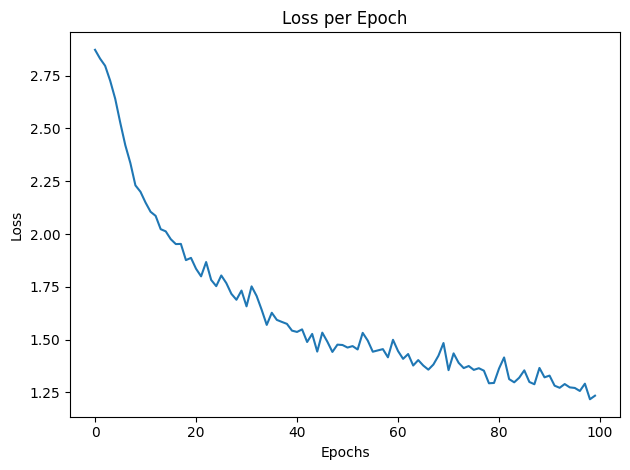

In [ ]:
plt.figure()
plt.plot(all_loss)
plt.title("Loss per Epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.tight_layout()
plt.show()

The confusion matrix shows how accurate the model is at predicting different classes, which helps us understand which classes are easily confused and which classes the model recognizes well.

In [ ]:
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000

def evaluate(line_tensor):
  hidden = rnn.initHidden()
  for i in range(line_tensor.size()[0]):
    output, hidden = rnn(line_tensor[i], hidden)
  return output

for i in range(n_confusion):
  category, line, category_tensor, line_tensor = randomTrainingExample()
  output = evaluate(line_tensor)
  guess, guess_i = categoryFromOutput(output)
  category_i = all_categories.index(category)
  confusion[category_i][guess_i] += 1

for i in range(n_categories):
  confusion[i] = confusion[i] / confusion[i].sum()

<ipython-input-47-a3320552e342>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([""]+all_categories, rotation=90)
<ipython-input-47-a3320552e342>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([""]+all_categories)


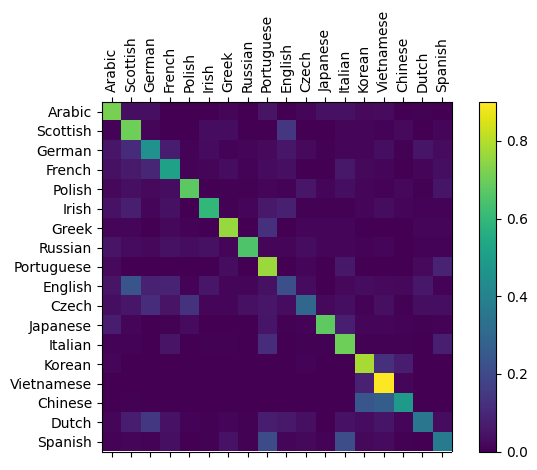

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)
ax.set_xticklabels([""]+all_categories, rotation=90)
ax.set_yticklabels([""]+all_categories)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
plt.tight_layout()
plt.show()

In [ ]:
def predict(input_line, n_predictions=3):
  print("\n> %s" % input_line)
  with torch.no_grad():
    output = evaluate(lineToTensor(input_line))
    topv, topi = output.topk(n_predictions, 1, True)
    predictions = []

    for i in range(n_predictions):
      value = topv[0][i].item()
      category_index = topi[0][i].item()
      print("(%.2f) %s" % (value, all_categories[category_index]))
      predictions.append([value, all_categories[category_index]])

In [ ]:
predict("Ballalatak")


> Ballalatak
(-1.18) Italian
(-1.57) Spanish
(-2.05) Polish


In [ ]:
predict("Bélanger")


> Bélanger
(-0.73) Irish
(-0.97) French
(-3.47) Portuguese


In [ ]:
predict("Junwei")


> Junwei
(-0.83) Korean
(-1.49) Chinese
(-2.14) Polish


In [ ]:
predict("Bersabeh")


> Bersabeh
(-1.23) Portuguese
(-1.47) Spanish
(-1.87) German
